# 3 排序图

## 3.4 坡度图

坡度图是对比两种不同类型下取值的最佳图像，适合比较给定的人/项目/数据的“之前”和“之后”的位置和变化。

**图中的元素：**<br>
点：plt.scatter & ax.scatter<br>
竖线：plt.vlines & ax.vlines<br>
文字：plt.text & ax.text<br>
两点之间的连线：？

横坐标：时间（前、后）<br>
纵坐标：人均国内生产总值（人均GDP）<br>
线条颜色：绿色表示上升，红色表示下降

### 3.4.1 导入需要的绘图库

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 3.4.2 在两点之间连线的函数

#### 3.4.2.1 创造直线对象的函数

**matplotlib.lines.Line2D()**

>重要参数：<br>
>>xdata：所有需要连接的点的横坐标<br>
>>ydata：所有需要连接的点的纵坐标<br>
>>marker：用于连线的点的形状<br>
>>markersize：用于连线的点的尺寸<br>

#### 3.4.2.2 添加直线对象

**add_line()**

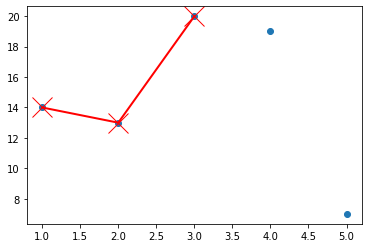

In [2]:
X = [1,2,3,4,5]
y = [14,13,20,19,7]

fig, ax = plt.subplots(1,1) #一行一列
ax.scatter(X, y) #不画散点无法画线

#fig, (ax1, ax2) = plt.subplots(1,2)
#ax1.scatter(X, y)

l = mlines.Line2D([1,2,3] #所有需要连接的点的横坐标
                 ,[14,13,20] #所有需要连接的点的纵坐标
                 ,color = 'red' #线的颜色
                 ,linewidth = 2 #线的宽度
                 ,marker = 'x' #绘制出来的点的形状，两端带有圆点的线(o)
                 ,markersize = 20 #线两端点的大小
                 )

ax.add_line(l) #将对象添加到子图上

In [3]:
#将上述过程打包成函数
def newline(p1, p2, color = 'black'):
    ax = plt.gca() #get current ax获取子图，如果没有子图则创建子图
    l = mlines.Line2D([p1[0], p2[0]]
                     ,[p1[1], p2[1]]
                     ,color = 'red' if p1[1]-p2[1] > 0 else 'green' #列表推导式
                     ,marker = 'o'
                     ,markersize = 6)
    ax.add_line(l)
    return l

### 3.4.3 认识数据，准备数据

In [4]:
#导入数据
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/gdppercap.csv')

In [5]:
df

,continent,1952,1957
0,Africa,1252.572466,1385.236062
1,Americas,4079.062552,4616.043733
2,Asia,5195.484004,4003.132940
3,Europe,5661.057435,6963.012816
4,Oceania,10298.085650,11598.522455


In [7]:
[*zip(df.continent, df['1952'])]

[('Africa', 1252.57246582115),
 ('Americas', 4079.0625522),
 ('Asia', 5195.484004039389),
 ('Europe', 5661.05743476),
 ('Oceania', 10298.08565)]

In [9]:
#从数据集中调取需要的标签
left_label = [str(c) + ', ' + str(round(y)) for c,y in zip(df.continent, df['1952'])]
right_label = [str(c) + ', ' + str(round(y)) for c,y in zip(df.continent, df['1957'])]

In [10]:
left_label

['Africa, 1253',
 'Americas, 4079',
 'Asia, 5195',
 'Europe, 5661',
 'Oceania, 10298']

In [11]:
right_label

['Africa, 1385',
 'Americas, 4616',
 'Asia, 4003',
 'Europe, 6963',
 'Oceania, 11599']

### 3.4.4 代码解读

In [12]:
df.shape[0]

5

In [13]:
np.repeat(1, df.shape[0]) #重复的对象和重复的次数

array([1, 1, 1, 1, 1])

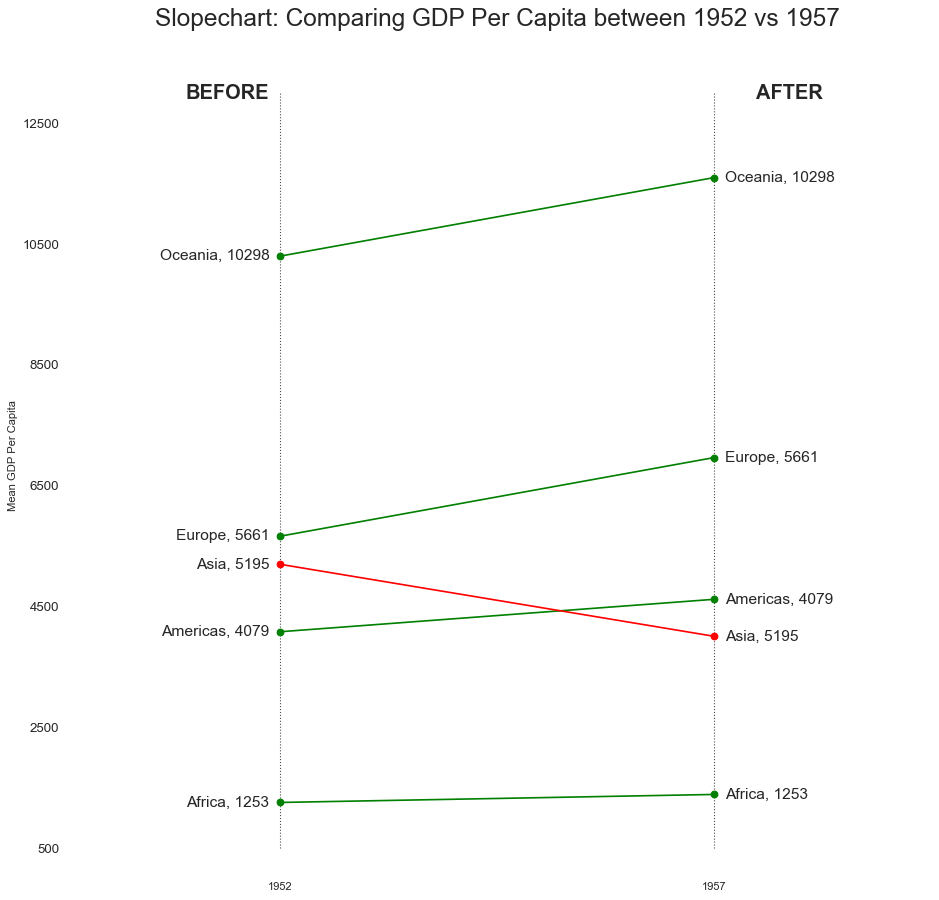

In [21]:
#设置风格(没有刻度短线)
plt.style.use('seaborn-whitegrid')
sns.set_style('white')

#定义绘制折线函数
def newline(p1, p2, color = 'black'):
    ax = plt.gca() #get current ax获取子图，如果没有子图则创建子图
    l = mlines.Line2D([p1[0], p2[0]]
                     ,[p1[1], p2[1]]
                     ,color = 'red' if p1[1]-p2[1] > 0 else 'green' #列表推导式
                     ,marker = 'o'
                     ,markersize = 6)
    ax.add_line(l)
    return l

#创建子图
fig, ax = plt.subplots(1,1, figsize=(14,14), dpi = 80) #1行1列

#绘制两条竖线
ax.vlines(x = 1
         ,ymin = 500
         ,ymax = 13000
         ,color = 'black'
         ,alpha = 0.7
         ,linewidth = 1
         ,linestyles = 'dotted' #点线
         )

ax.vlines(x = 3
         ,ymin = 500
         ,ymax = 13000
         ,color = 'black'
         ,alpha = 0.7
         ,linewidth = 1
         ,linestyles = 'dotted' #点线
         )

#在两条线的每个数据点上打上散点
ax.scatter(y = df['1952']
          ,x = np.repeat(1, df.shape[0])
          ,s = 10
          ,color = 'black'
          ,alpha = 0.7
          )

ax.scatter(y = df['1957']
          ,x = np.repeat(3, df.shape[0])
          ,s = 10
          ,color = 'black'
          ,alpha = 0.7
          )

#绘制折线
for p1, p2, c in zip(df['1952'], df['1957'], df['continent']):
    newline([1,p1],[3,p2])
    #在每个数据点的旁边添加文字
    #左边
    ax.text(1-0.05 #横坐标
           ,p1 #纵坐标
           ,c + ', ' + str(round(p1)) #添加的文字
           ,horizontalalignment = 'right' #横向文字在左边
           ,verticalalignment = 'center' #纵向文字在中间
           ,fontdict = {'size': 14}
           )
    #右边
    ax.text(3+0.05 #横坐标
           ,p2 #纵坐标
           ,c + ', ' + str(round(p1)) #添加的文字
           ,horizontalalignment = 'left' #横向文字在右边
           ,verticalalignment = 'center' #纵向文字在中间
           ,fontdict = {'size': 14}
           )

#将'before'和'after'字样放到图像中
ax.text(1-0.05
       ,13000
       ,'BEFORE'
       ,horizontalalignment = 'right'
       ,verticalalignment = 'center'
       ,fontdict = {'size': 18 #字体大小
                   ,'weight':700 #加粗文字
                   }
       )
ax.text(3+0.5
       ,13000
       ,'AFTER'
       ,horizontalalignment = 'right'
       ,verticalalignment = 'center'
       ,fontdict = {'size': 18 #字体大小
                   ,'weight':700 #加粗文字
                   }
       )

#装饰图像
ax.set_title("Slopechart: Comparing GDP Per Capita between 1952 vs 1957", fontdict={'size':22}) #标题
ax.set(xlim=(0,4), ylim=(0,14000), ylabel='Mean GDP Per Capita') #横纵坐标取值范围，横坐标标题
ax.set_xticks([1,3]) #横坐标的标尺
ax.set_xticklabels(["1952", "1957"]) #横坐标标尺的标题
plt.yticks(np.arange(500, 13000, 2000), fontsize=12) #设置纵坐标的标尺，ax.set_yticks无法调整标尺大小

#边框透明化
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
plt.show()

### 3.4.5 图像解读

大洋洲最富有，非洲最贫穷，变化可结合战争背景。

1950\~1953：朝鲜战争<br>
1946\~1954：第一次印尼战争<br>
1952\~1957：一五计划，人口激增